In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import classifiers

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Prepairing dataset

In [3]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X, y, test_size=0.9, train_size=0.1)
x_train, x_test, y_train, y_test = train_test_split( X_TEST, Y_TEST, test_size=0.15)
x_train_crossval, y_train_crossval = X_TRAIN, Y_TRAIN

print('CrossValidation size = ', x_train_crossval.shape[0])

print('Train set size = ', x_train.shape[0])
print('Test set size = ', x_test.shape[0])

CrossValidation size =  7000
Train set size =  53550
Test set size =  9450


In [4]:
def drawSupportVectors(model, num_samples=5, imSize=28):
    examples = np.zeros((num_samples * 10, imSize*imSize))
    for i in range(10):
        examples[i*num_samples:i*num_samples+num_samples] = model.support_vectors_[ np.sum(model.n_support_[:i]) : np.sum(model.n_support_[:i]) + num_samples ]

    fig, axes = plt.subplots(10, num_samples, figsize=(5, 12), constrained_layout=True)
    for ax, img in zip(axes.flat, examples):
        ax.imshow(img.reshape(imSize, imSize))
    
    plt.show()

def drawDistribution(x, y, num_features=4):
    size = num_features
    plt.figure(figsize=(18, 18), dpi=100)
    for x_ in range(size):
        for y_ in range(size):
            plt.subplot(size, size, 1 + x_*size + y_)
            if (x_ != y_):
                plt.scatter(x[:, x_], x[:, y_], c= list(map(int, y)), s=20, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 20))

In [5]:
svm_model = None

def Test(dataset):
    global svm_model
    print('\nLogisticRegression processing...')
    classifiers.Logistic_Regression(*dataset)
    print('\nKNN processing...')
    classifiers.KNN(*dataset)
    print('\nDesicionTree processing...')
    classifiers.DesicionTree(*dataset)
    print('\nSVM processing...')
    svm_model = classifiers.SVM(*dataset)

# HyperParameters


LogisticRegression processing...
Best model params: 
Penalty: l1 | Tol: 0.1 | Solver: saga - > Accuracy = 0.8967142857142857
Accuracy:  0.9222222222222223

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 5 - > Accuracy = 0.9372857142857143
Accuracy:  0.9687830687830687

DesicionTree processing...
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 11 - > Accuracy = 0.7935714285714287
Accuracy:  0.8754497354497355

SVM processing...
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.1 - > Accuracy = 0.9588571428571427
Accuracy:  0.9821164021164022
SVM supprt vectors:


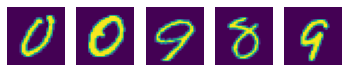

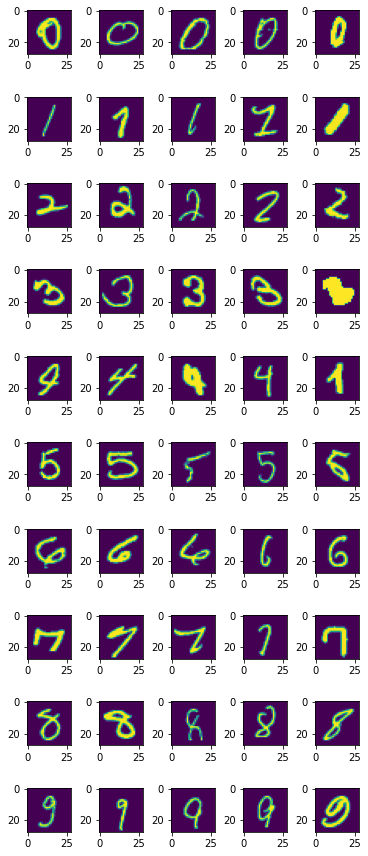

In [6]:
dataset = [x_train_crossval, y_train_crossval, x_train, y_train, x_test, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train[i], (28,28)))

Test(dataset)

print("SVM supprt vectors:")
drawSupportVectors(svm_model, 5, 28)

# Standart scaller


LogisticRegression processing...
Best model params: 
Penalty: l1 | Tol: 0.01 | Solver: saga - > Accuracy = 0.9005714285714287
Accuracy:  0.9108994708994709

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 3 - > Accuracy = 0.9185714285714285
Accuracy:  0.9588359788359788

DesicionTree processing...
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 17 - > Accuracy = 0.7954285714285715
Accuracy:  0.8757671957671957

SVM processing...
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.937
Accuracy:  0.9717460317460317


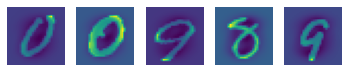

In [7]:
scaler = StandardScaler()
x_train_s_stsc = scaler.fit_transform(x_train_crossval, y_train_crossval)
x_train_stsc = scaler.fit_transform(x_train, y_train)
x_test_stsc = scaler.transform(x_test)
dataset = [x_train_s_stsc, y_train_crossval, x_train_stsc, y_train, x_test_stsc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_stsc[i], (28,28)))

Test(dataset)
#105m

# MinMax scaler


LogisticRegression processing...
Best model params: 
Penalty: l1 | Tol: 0.1 | Solver: saga - > Accuracy = 0.8984285714285715
Accuracy:  0.9242328042328042

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 1 - > Accuracy = 0.9371428571428572
Accuracy:  0.9739682539682539

DesicionTree processing...
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 19 - > Accuracy = 0.7947142857142857
Accuracy:  0.873015873015873

SVM processing...
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.9584285714285713
Accuracy:  0.982010582010582


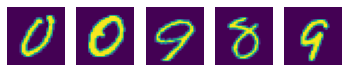

In [8]:
scaler = MinMaxScaler()
x_train_s_stmm = scaler.fit_transform(x_train_crossval, y_train_crossval)
x_train_stmm = scaler.fit_transform(x_train, y_train)
x_test_stmm = scaler.transform(x_test)
dataset = [x_train_s_stmm, y_train_crossval, x_train_stmm, y_train, x_test_stmm, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_stmm[i], (28,28)))

Test(dataset)
#121m

# PCA


LogisticRegression processing...
Best model params: 
Penalty: l2 | Tol: 0.1 | Solver: saga - > Accuracy = 0.8872857142857142
Accuracy:  0.8996825396825396

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 3 - > Accuracy = 0.9477142857142857
Accuracy:  0.9764021164021164

DesicionTree processing...
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 11 - > Accuracy = 0.7648571428571429
Accuracy:  0.8335449735449736

SVM processing...
Best model params: 
C: 2 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.9642857142857142
Accuracy:  0.9842328042328042
SVM supprt vectors:


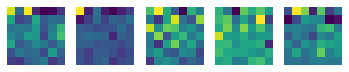

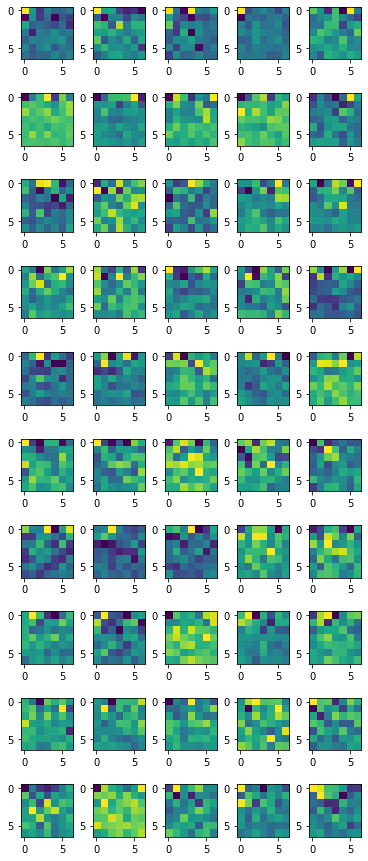

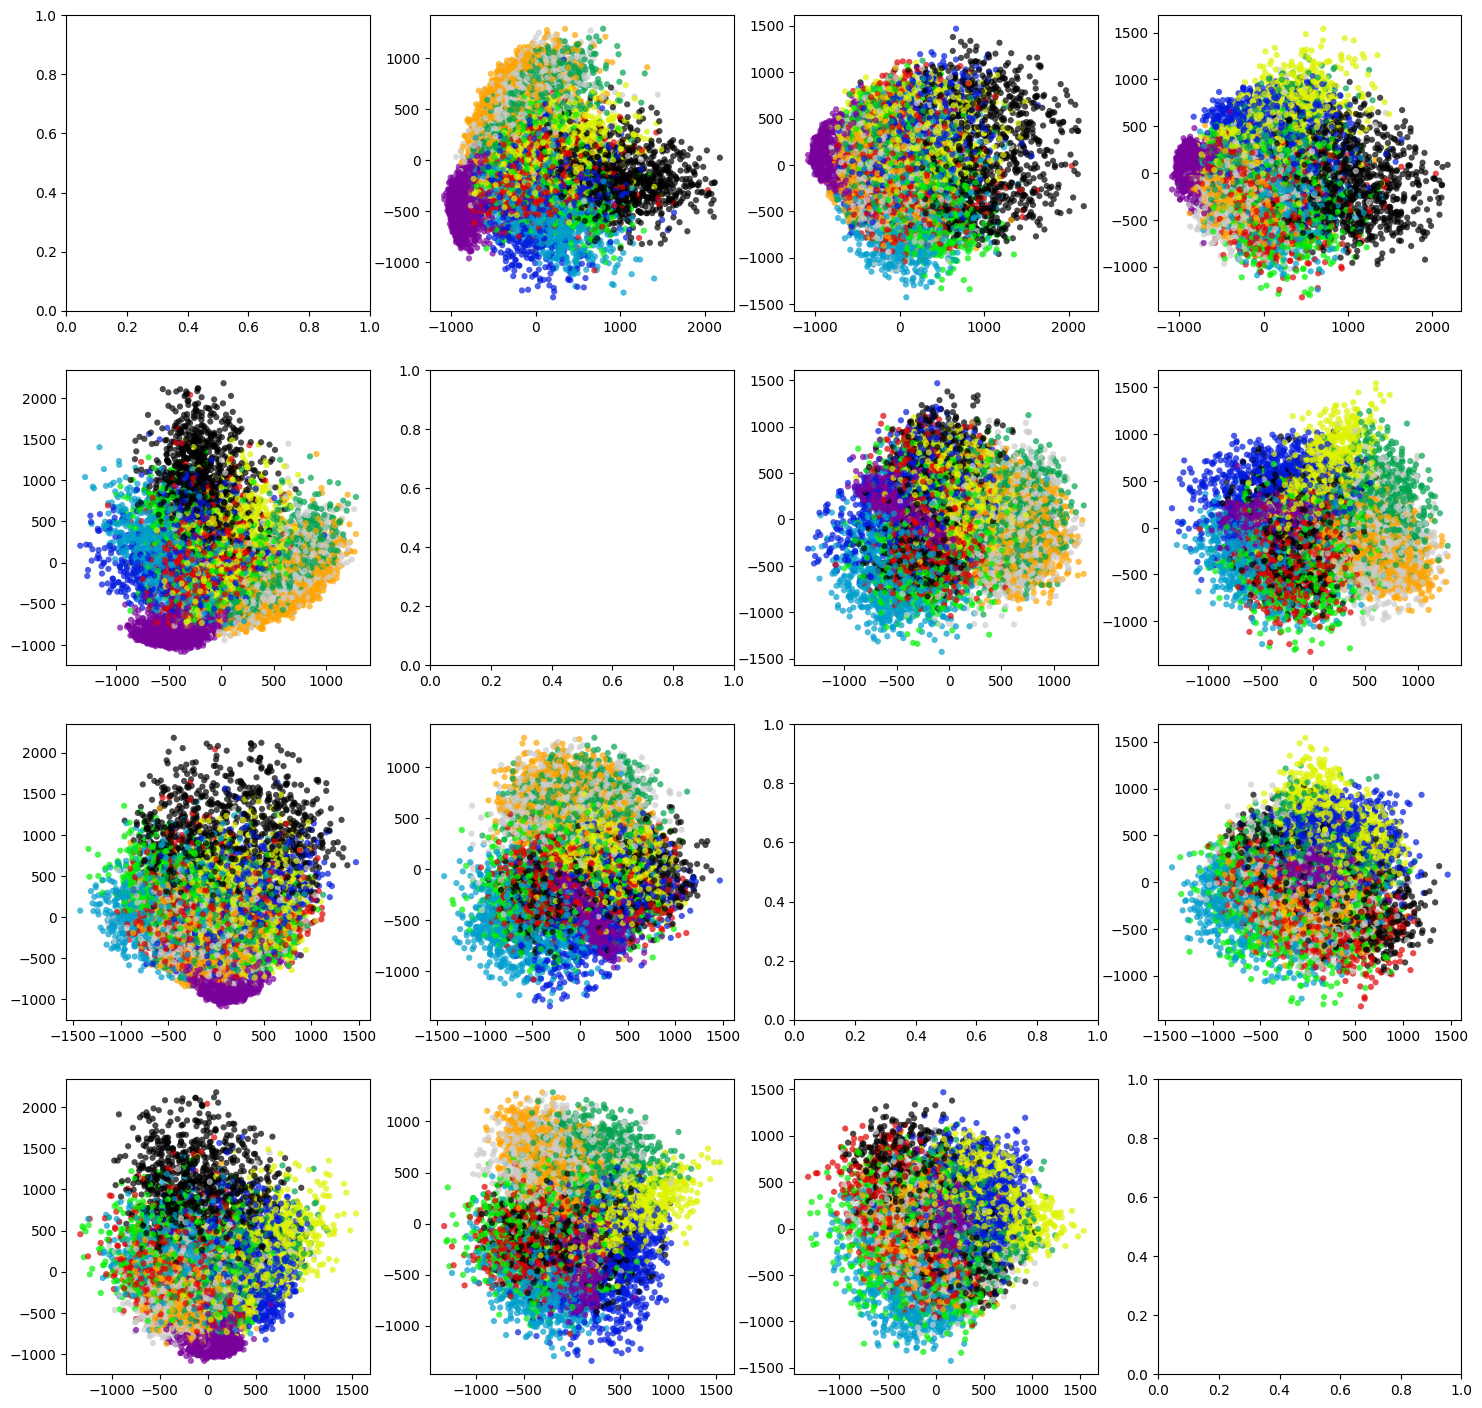

In [9]:
pca = PCA(n_components = 49)
x_train_s_pc = pca.fit_transform(x_train_crossval, y_train_crossval)
x_train_pc = pca.fit_transform(x_train, y_train)
x_test_pc = pca.transform(x_test)
dataset = [x_train_s_pc, y_train_crossval, x_train_pc, y_train, x_test_pc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc[i], (7,7)))

Test(dataset)

print("SVM supprt vectors:")
drawSupportVectors(svm_model, 5, 7)
drawDistribution(x_test_pc, y_test, 4)
#18m

# PCA+MinMax


LogisticRegression processing...
Best model params: 
Penalty: l1 | Tol: 0.01 | Solver: saga - > Accuracy = 0.8867142857142856
Accuracy:  0.9094179894179895

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 3 - > Accuracy = 0.931
Accuracy:  0.9715343915343916

DesicionTree processing...
Best model params: 
Criterion: gini | Splitter: best | Max_depth: 15 - > Accuracy = 0.766
Accuracy:  0.8394708994708995

SVM processing...
Best model params: 
C: 2 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.96
Accuracy:  0.983915343915344


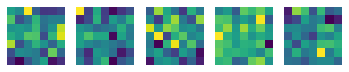

In [10]:
pca = PCA(n_components = 49)
scaler = MinMaxScaler()
x_train_s_pc_scmm = scaler.fit_transform(pca.fit_transform(x_train_crossval, y_train_crossval))
x_train_pc_scmm = scaler.fit_transform(pca.fit_transform(x_train, y_train))
x_test_pc_scmm = scaler.transform(pca.transform(x_test))
dataset = [x_train_s_pc_scmm, y_train_crossval, x_train_pc_scmm, y_train, x_test_pc_scmm, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc_scmm[i], (7,7)))

Test(dataset)
#13m

# PCA+StandartScater


LogisticRegression processing...
Best model params: 
Penalty: l1 | Tol: 0.01 | Solver: saga - > Accuracy = 0.8931428571428572
Accuracy:  0.9092063492063492

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 1 - > Accuracy = 0.9247142857142856
Accuracy:  0.9692063492063492

DesicionTree processing...
Best model params: 
Criterion: gini | Splitter: best | Max_depth: 13 - > Accuracy = 0.7658571428571428
Accuracy:  0.8371428571428572

SVM processing...
Best model params: 
C: 2 | Kernel: rbf | Tol: 0.1 - > Accuracy = 0.959
Accuracy:  0.9828571428571429


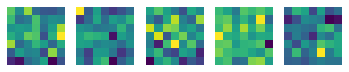

In [11]:
pca = PCA(n_components = 49)
scaler = StandardScaler()
x_train_s_pc_stsc = scaler.fit_transform(pca.fit_transform(x_train_crossval, y_train_crossval))
x_train_pc_stsc = scaler.fit_transform(pca.fit_transform(x_train, y_train))
x_test_pc_stsc = scaler.transform(pca.transform(x_test))
dataset = [x_train_s_pc_stsc, y_train_crossval, x_train_pc_stsc, y_train, x_test_pc_stsc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc_stsc[i], (7,7)))

Test(dataset)